# AI Domain: Convolutional Neural Networks (CNN)

## CNN Project 01: "Smart Vision -> A Powerful CNN-Based Face Recognition Model"
| Prepared by | Rayyan Ahmed |
|-------------|--------------|
| Date | 6th March, 2025 |

## Libraries Used:
- Numpy
- Pandas
- Matplotlib
- Scikit Learn
- Tensorflow
- Keras








<br>

# Loading DataFrame

<br>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

In [ ]:
df = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
df

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
         0.3803922 ],
        [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
         0.53594774],
        [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
         0.7163399 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
          0.24836601, 0.20653595],
         [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21568628],
         [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
          0.24183007, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
     

In [ ]:
df.data.shape, df.images.shape

((1288, 1850), (1288, 50, 37))

---

#### Each row in the data array corresponds to one image, and each value in that row represents a pixel's intensity (normalized between 0 and 1).

#### Since the shape is (1288, 1850):

- 1288 → Total number of images.
- 1850 → Number of pixel values per image (which means each image has 1850
  pixels).

#### Example:
- Look at the first row of data: [0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533, 0.3803922 ] which is representing 1st image of dataset.
- Here, the values "0.9973857, 0.99607843... 0.3803922" are representing the pixels of 1st image.
- i.e: 1st pixel is 99.73857% gray, 2nd is 99.607843% gray and last pixel is 38.03922% gray.

---

---

#### Each double bracket [[ ... ]] represents a single image, which is a 2D matrix (height × width).

#### From the shape (1288, 50, 37), we can see that:

- Each image has 50 rows (height).
- Each row has 37 values (width, i.e., columns).
- Each double bracket [[ ... ]] contains 50 rows, where each row has 37 values.

---

In [ ]:
import numpy as np

# Assuming images and labels are already loaded as NumPy arrays
images_label_1 = df.images[df.target == 1]  # Select only images where label is 1

# Print shape of filtered images
print(images_label_1)


[[[0.04705882 0.01699346 0.02352941 ... 0.02745098 0.02352941 0.02222222]
  [0.2771242  0.13202615 0.03529412 ... 0.02745098 0.02222222 0.02222222]
  [0.50849676 0.3882353  0.21960784 ... 0.03006536 0.02091503 0.01437909]
  ...
  [0.43529412 0.39607844 0.3267974  ... 0.1006536  0.19215687 0.25490198]
  [0.33333334 0.3019608  0.27189544 ... 0.07189543 0.16078432 0.21960784]
  [0.26666668 0.23660131 0.22352941 ... 0.06535948 0.14248367 0.20130719]]

 [[0.24705882 0.28627452 0.30718955 ... 0.7660131  0.66013074 0.5163399 ]
  [0.27320263 0.2901961  0.30588236 ... 0.76732033 0.69673204 0.5267974 ]
  [0.28235295 0.29542485 0.32026145 ... 0.73071903 0.7320261  0.5764706 ]
  ...
  [0.20261438 0.530719   0.6653595  ... 0.27450982 0.38431373 0.43398693]
  [0.07320262 0.33071896 0.6366013  ... 0.22222222 0.4013072  0.45098042]
  [0.0496732  0.14771242 0.5294118  ... 0.20261438 0.30588236 0.43398693]]

 [[0.45751634 0.44313726 0.47843137 ... 0.09411765 0.05490196 0.0496732 ]
  [0.5045752  0.503268

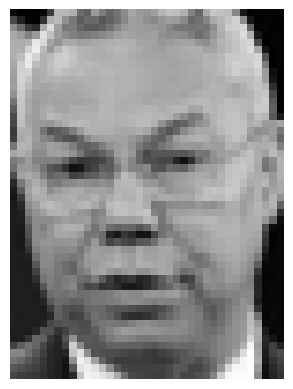

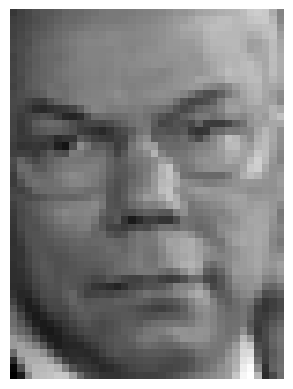

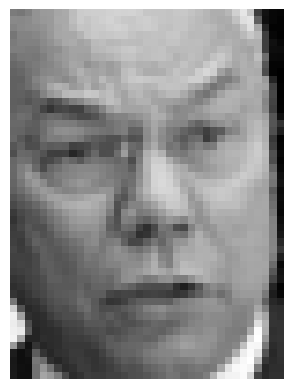

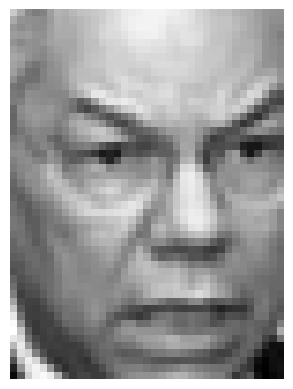

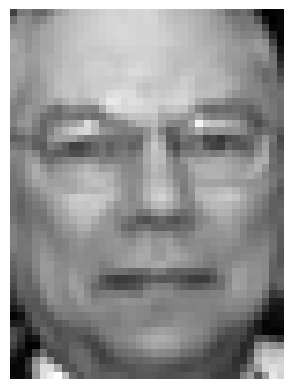

In [ ]:
import matplotlib.pyplot as plt

# Iterate over images and show them
for i in range(min(5, len(images_label_1))):  # Show up to 5 images
    plt.imshow(images_label_1[i], cmap='gray')  # Convert series to NumPy array
    plt.axis('off')  # Hide axes
    plt.show()


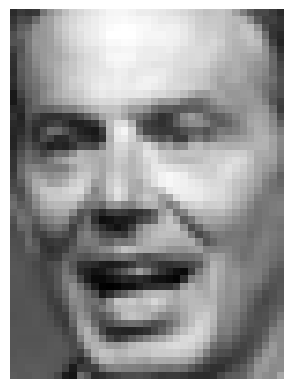

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape first image (assuming a shape of 50x37 or 43x43)
image = df.data[1].reshape((50, 37))  # Adjust based on the actual image dimensions

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


<br>

# Seperating x and y

<br>

In [ ]:
x, y = df.images, df.target

In [ ]:
target_names = df.target_names

In [ ]:
print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1288, 50, 37), y shape: (1288,)


<br>

# Reshaping x for CNN Ease

<br>

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

<br>

# One-hot Encoding of y

<br>


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_categorical = to_categorical(y)
y_categorical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

<br>

# Train Test Split

<br>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

print(f"Training data: {x_train.shape}, Test data: {x_test.shape}")

Training data: (1030, 50, 37, 1), Test data: (258, 50, 37, 1)


In [ ]:
x_train
x_test
y_train
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

<br>

# Building Sequential Layers

<br>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 37, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(target_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4928)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         630,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,631 (2.48 MB)

 Trainable params: 650,631 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

<br>

# Fitting Model

<br>

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))
history

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.3299 - loss: 1.8265 - val_accuracy: 0.4612 - val_loss: 1.6099
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.3752 - loss: 1.7626 - val_accuracy: 0.4612 - val_loss: 1.5650
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4061 - loss: 1.6549 - val_accuracy: 0.4690 - val_loss: 1.4550
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.4556 - loss: 1.5267 - val_accuracy: 0.5426 - val_loss: 1.2889
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5040 - loss: 1.3722 - val_accuracy: 0.6395 - val_loss: 1.1122
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5946 - loss: 1.1558 - val_accuracy: 0.7093 - val_loss: 0.9731
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6355 - loss: 1.0464 - val_accuracy: 0.7054 - val_loss: 0.8918
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.6640 - loss: 0.8735 - val_accuracy: 0.7558 - 

<br>

# Model Accuracy

<br>

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.3f} %")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8817 - loss: 0.4260
Test Accuracy: 87.597 %


<br>

# Classification Report

<br>

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.64      0.70        11
     Colin Powell       0.85      0.94      0.89        47
  Donald Rumsfeld       0.89      0.73      0.80        22
    George W Bush       0.93      0.97      0.95       119
Gerhard Schroeder       0.75      0.79      0.77        19
      Hugo Chavez       0.75      0.46      0.57        13
       Tony Blair       0.85      0.81      0.83        27

         accuracy                           0.88       258
        macro avg       0.83      0.76      0.79       258
     weighted avg       0.87      0.88      0.87       258



<br>

# Image Name Predictor

<br>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


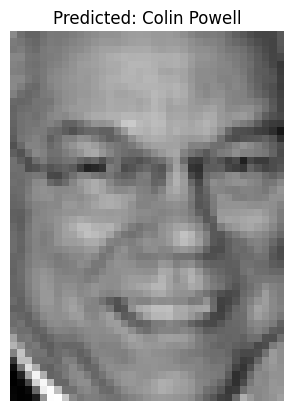

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_face_from_dataset(index):
    img = x_test[index]

    img_expanded = np.expand_dims(img, axis=0)

    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    predicted_name = target_names[predicted_class]

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_name}")
    plt.axis("off")
    plt.show()

predict_face_from_dataset(7)